INFO: Read 18 TLEs from /Users/umangsharma/Desktop/LEO-GEO-orbital-tracking-and-prediction/data/raw/TELESAT.txt
INFO: Parsed 18 satellites


Sample satellite positions from TELESAT.txt:
NIMIQ 2 - (np.float64(41771.82), np.float64(2069.19), np.float64(-5528.47))
ANIK F2 - (np.float64(42125.74), np.float64(411.38), np.float64(-2029.96))
ANIK F1R - (np.float64(41961.38), np.float64(3232.95), np.float64(-2714.49))
ANIK F3 - (np.float64(41856.63), np.float64(-5130.84), np.float64(-509.77))
NIMIQ 4 - (np.float64(36643.97), np.float64(20875.33), np.float64(-77.1))


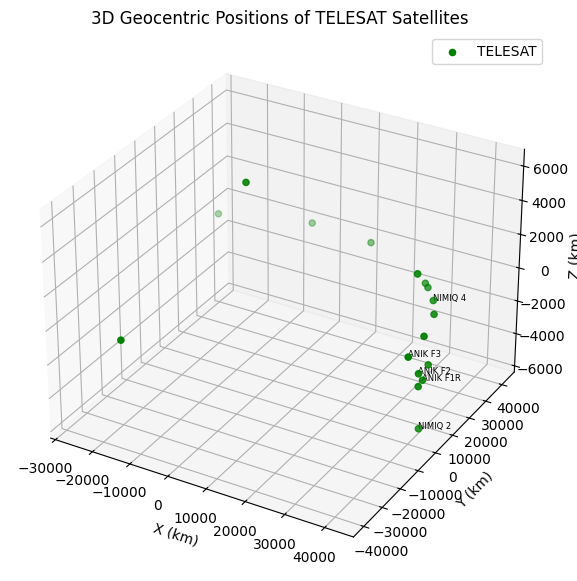

In [ ]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots

project_root = Path("/Users/umangsharma/Desktop/LEO-GEO-orbital-tracking-and-prediction")
sys.path.append(str(project_root))
from src.data_utils import load_group, get_positions


tle_file_name = "INTELSAT.txt" 
tle_file = project_root / f"data/raw/{tle_file_name}"


sats = load_group(tle_file)

positions = get_positions(sats)

print(f"Sample satellite positions from {tle_file_name}:")
for name, pos in list(positions.items())[:5]:
    print(name, "-", pos)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

xs = [pos[0] for pos in positions.values()]
ys = [pos[1] for pos in positions.values()]
zs = [pos[2] for pos in positions.values()]
labels = list(positions.keys())
ax.scatter(xs, ys, zs, c='green', marker='o', s=20, label=tle_file_name.split('.')[0])

for i, label in enumerate(labels[:5]):
    ax.text(xs[i], ys[i], zs[i], label, size=6, zorder=1)

ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title(f'3D Geocentric Positions of {tle_file_name.split(".")[0]} Satellites')
plt.legend()
plt.show()

